![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

### Итоговое задание Стрибук Иван (DSPR-37)
### по Проекту 3. О вкусной и здоровой пище 
####  Юнит 3. Введение в машинное обучение (отредактирован 26.07.2021)
---

# import

In [226]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [227]:
from datetime import datetime, timedelta
import re

In [228]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [229]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [230]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [231]:
pd.set_option('display.max_columns', 200) # смотреть удобно таблицы

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [233]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [234]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [235]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [236]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [237]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [238]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [240]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
21140,id_368,Luxembourg,['Italian'],369.0,NaN,2.0,"[[""Probably the best Italian restaurant I've.....",/Restaurant_Review-g190356-d743871-Reviews-Gri...,d743871,1,5.0
21709,id_1115,Amsterdam,"['Italian', 'Dutch', 'European', 'Healthy', 'M...",1118.0,$$ - $$$,16.0,"[['One of the best pizzas in town', ""Amazing v...",/Restaurant_Review-g188590-d12634218-Reviews-M...,d12634218,1,4.5
14461,id_334,Milan,"['Italian', 'Bar', 'Seafood', 'Mediterranean',...",335.0,$$ - $$$,1087.0,"[['Great service, friendly staff but average.....",/Restaurant_Review-g187849-d1025805-Reviews-Ma...,d1025805,1,4.0
37410,id_3083,Milan,['Italian'],3085.0,NaN,25.0,"[[], []]",/Restaurant_Review-g187849-d8774603-Reviews-La...,d8774603,1,4.0
12029,id_618,Lisbon,"['Seafood', 'European', 'Portuguese']",619.0,$$ - $$$,286.0,"[['Very good restaurant, lively ambience', 'Gr...",/Restaurant_Review-g189158-d2028026-Reviews-O_...,d2028026,1,4.0


In [241]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

In [242]:
# Restaurant_id
data['code_Restaurant_id'] = data['Restaurant_id'].apply(lambda x: float(x[3:]))

Визуальный осмотр показал, что код Restaurant_id очень сильно похож на Ranking в data_train.
Надо проверить корреляцию и при необходимости удалить 'code_Restaurant_id'

In [243]:
rest_id_corr = data[['code_Restaurant_id', 'Ranking']]

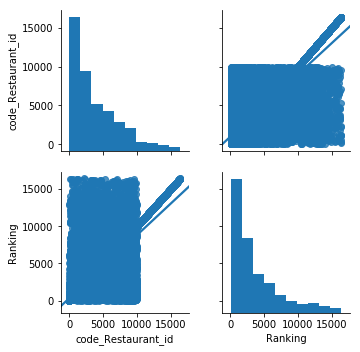

In [244]:
sns.pairplot(rest_id_corr, kind = 'reg')

In [245]:
# Используем для наглядности матрицу корреляций:
rest_id_corr.corr()

,code_Restaurant_id,Ranking
code_Restaurant_id,1.00000,0.82509
Ranking,0.82509,1.00000


In [246]:
# вспоминаем Резюме по критерию code_Restaurant_id. Удаляем так как была гипотеза о корреляции с Ranking
data.drop(['code_Restaurant_id'], axis=1, inplace=True, errors='ignore')

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [247]:
# вынесем пропуски в данных отдельным параметром
data['NoR NAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [248]:
# глянем в статистику
data['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

Медиана и средняя сильно разняться, это значит, что в параметре много выбросов. для более детальной картины можно глянуть статистику по городам.

In [249]:
data['City'].value_counts().sort_index(ascending=True)

Amsterdam     1372
Athens         776
Barcelona     3395
Berlin        2705
Bratislava     380
Brussels      1314
Budapest      1021
Copenhagen     819
Dublin         836
Edinburgh      745
Geneva         590
Hamburg       1186
Helsinki       475
Krakow         554
Lisbon        1647
Ljubljana      222
London        7193
Luxembourg     263
Lyon          1126
Madrid        3813
Milan         2694
Munich        1145
Oporto         642
Oslo           488
Paris         6108
Prague        1816
Rome          2589
Stockholm     1033
Vienna        1443
Warsaw         925
Zurich         685
Name: City, dtype: int64

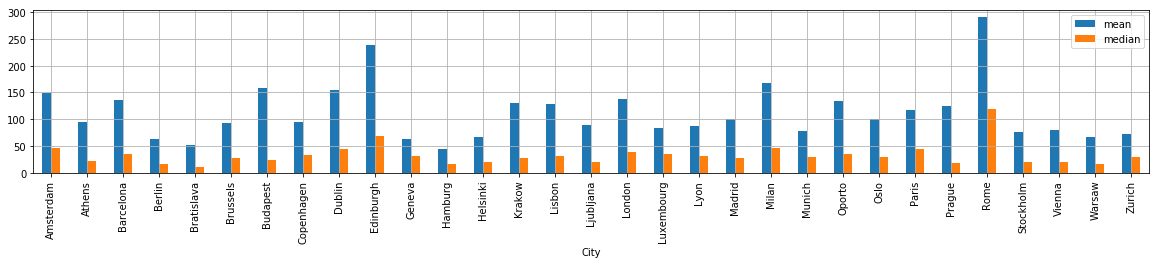

In [250]:
data.groupby(['City'])['Number of Reviews'].agg(['mean','median']).plot(kind='bar',figsize=[20,3],grid=True)

In [251]:
# будем заполнять пропуски медианой по городам, она в данном случае более объективно представляет информацию

gb_city = round(data.groupby(['City'])['Number of Reviews'].median()).to_dict() # создаем словарь
data['Number of Reviews'].fillna(data['City'].map(gb_city),inplace=True) # заменяем пропуски, применяя словарь

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [252]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1573
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
NoR NAN                  2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [253]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
# перенесено после формирования признаков с использованием колонки City
#data = pd.get_dummies(data, columns=['City'], dummy_na=True)

In [254]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,NoR NAN
18599,id_1955,Budapest,"['Italian', 'Pizza']",1956.0,$,4.0,"[['Great pizza on the go', 'One of the best pi...",/Restaurant_Review-g274887-d10747810-Reviews-P...,d10747810,1,4.0,0
13104,id_675,Hamburg,"['Mediterranean', 'Greek', 'Seafood']",676.0,$$ - $$$,10.0,"[['Great food and atmosphere, a gem'], ['08/29...",/Restaurant_Review-g187331-d10289051-Reviews-O...,d10289051,1,4.5,0
12454,id_2898,Rome,"['Italian', 'Mediterranean', 'Vegetarian Frien...",2899.0,$$ - $$$,242.0,"[['Budapest 1039 Viziorgona u. 4', 'Tasty food...",/Restaurant_Review-g187791-d1892486-Reviews-Lo...,d1892486,1,4.0,0
14003,id_9987,London,"['Pizza', 'European', 'Italian', 'Mediterranea...",9996.0,$$ - $$$,23.0,"[['Great local restaurant', 'Granddaughters Bi...",/Restaurant_Review-g186338-d4295303-Reviews-Pi...,d4295303,1,3.5,0
39622,id_179,Brussels,"['Italian', 'Mediterranean', 'European', 'Vege...",180.0,$$ - $$$,90.0,[['A restaurant recommended by the Italians t....,/Restaurant_Review-g188644-d7254830-Reviews-Sa...,d7254830,1,4.5,0


#### Возьмем следующий признак "Price Range".

In [255]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [256]:
# и кол-во пропусков
display(data['Price Range'].isna().sum())

17361

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [257]:
# Ваша обработка 'Price Range'
# 23041 ресторанов это более 70% из заполненной информации имеют средний параметр цены
# поэтому заполняем пропуски двойкой (2)
data['Price Range'].fillna('$$ - $$$', inplace = True)
# заполним значения в переменной.
data['Price Range'].replace({'$': 1,'$$ - $$$': 2,'$$$$': 3}, inplace = True)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [258]:
data['Cuisine Style'].value_counts(dropna=False).head(20)

NaN                             11590
['Italian']                      1332
['French']                       1019
['Spanish']                       860
['French', 'European']            503
['Cafe']                          500
['Pizza']                         454
['Italian', 'Pizza']              422
['Chinese']                       418
['European', 'Portuguese']        415
['Mediterranean']                 311
['Bar', 'Pub']                    307
['Mediterranean', 'Spanish']      293
['Vegetarian Friendly']           276
['Indian']                        270
['Fast Food']                     263
['International']                 247
['Japanese']                      247
['Italian', 'Mediterranean']      245
['European']                      245
Name: Cuisine Style, dtype: int64

In [259]:
data[['City', 'Cuisine Style']].groupby('City').describe()

Cuisine Style                                        
                   count unique                         top freq
City                                                            
Amsterdam           1170    717       ['Dutch', 'European']   33
Athens               627    302                   ['Greek']   92
Barcelona           2608   1021                 ['Spanish']  249
Berlin              1793    784                 ['Italian']   96
Bratislava           236    162                     ['Pub']   15
Brussels             992    491     ['Belgian', 'European']   54
Budapest             819    509   ['European', 'Hungarian']   72
Copenhagen           616    360      ['European', 'Danish']   21
Dublin               704    440     ['Irish', 'Bar', 'Pub']   24
Edinburgh            649    412                    ['Cafe']   17
Geneva               474    261                  ['French']   23
Hamburg              666    349                 ['Italian']   29
Helsinki             373    235              ['Bar', 'Pub']   11
Krakow               436    282      ['Polish', 'European']   42
Lisbon              1248    513  ['European', 'Portuguese']  269
Ljubljana            189    146   ['European', 'Slovenian']   10
London              5983   2220   ['Bar', 'British', 'Pub']  209
Luxembourg           222    143                  ['French']   11
Lyon                 747    255                  ['French']  192
Madrid              2634    857                 ['Spanish']  514
Milan               1986    700                 ['Italian']  335
Munich               816    429                 ['Italian']   34
Oporto               492    246  ['European', 'Portuguese']  100
Oslo                 388    292                     ['Pub']   10
Paris               4800   1153                  ['French']  674
Prague              1509    651       ['European', 'Czech']  228
Rome                2270    854                 ['Italian']  230
Stockholm            723    390     ['European', 'Swedish']   35
Vienna              1041    573    ['Austrian', 'European']   90
Warsaw               671    381      ['Polish', 'European']   52
Zurich               528    362       ['Swiss', 'European']   19

In [260]:
data[['City', 'Cuisine Style']].groupby('City')['Cuisine Style'].value_counts()['London'].head(10)

Cuisine Style
['Bar', 'British', 'Pub']                           209
['British']                                         148
['Cafe']                                            122
['Indian']                                           99
['Italian']                                          93
['Bar', 'British', 'Pub', 'Vegetarian Friendly']     87
['Chinese']                                          75
['Chinese', 'Asian']                                 68
['Bar', 'Pub']                                       59
['Fast Food']                                        55
Name: Cuisine Style, dtype: int64

In [261]:
# тут ваш код на обработку других признаков

#Заполняем пропуски для обзоров пустой строкой
data['Reviews'].fillna('', inplace = True)

#заполняем пропуски для видов кухни
data['Cuisine Style'].fillna('Unknown', inplace = True)

#Создаем признак для видов кухни типа list, предварительно убрав лишние символы 
data['Cuisine_Style_List'] = data['Cuisine Style'].str.replace("[",'').str.replace("]",'').str.replace("'","").str.replace(", ",",")
data['Cuisine_Style_List'] = data['Cuisine_Style_List'].str.split(',')

#Определяем кол-во видов кухни для ресторана
data['Cuisine_Count'] = data['Cuisine_Style_List'].apply(lambda x: len(x))


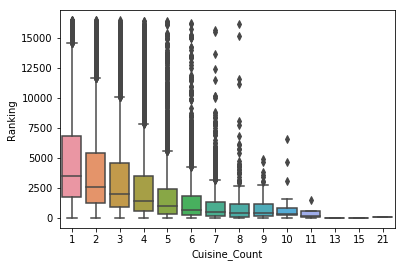

In [262]:
# Заметно, что чем более разнообразна кухня, тем менше рейтинг ресторана. 
sns.boxplot(x='Cuisine_Count', y='Ranking', data=data)

In [263]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,NoR NAN,Cuisine_Style_List,Cuisine_Count
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,"[Bar, Pub]",2
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,"[European, Scandinavian, Gluten Free Options, ...",5
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,[Vegetarian Friendly],1
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,"[Italian, Mediterranean, European, Vegetarian ...",5
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,"[Italian, Mediterranean, European, Seafood, Ve...",6


In [264]:
#функция для извлечения дат отзывов
def get_dates(value):
    pat = re.compile("\d\d/\d\d/\d\d\d\d")
    review_list = pat.findall(value)
    return review_list

#функция для определения минимальной даты
def get_min_date(value):
    #Заполняем 0 для пустых значений по умолчанию, позднее его заменим в признаке
    res = 0
    if len(value) > 1:
        res = min(datetime.strptime(value[0],"%m/%d/%Y"), datetime.strptime(value[1],"%m/%d/%Y"))
    elif len(value) == 1:
        res = datetime.strptime(value[0],"%m/%d/%Y")
    return res

#функция для определения максимальной даты
def get_max_date(value):
    #Заполняем 0 для пустых значений по умолчанию, позднее его заменим в признаке
    res = 0
    if len(value) > 1:
        res = max(datetime.strptime(value[0],"%m/%d/%Y"), datetime.strptime(value[1],"%m/%d/%Y"))
    elif len(value) == 1:
        res = datetime.strptime(value[0],"%m/%d/%Y")    
    return res

#функция для извлечения слов из отзывов
def get_words(value):
    #слова с not
    pat=re.compile('[Nn]ot [A-Za-z]+')
    review_list_n = pat.findall(value)
    for word in review_list_n:
        value = value.replace(word,'')
    
    pat=re.compile('[A-Za-z]+')
    review_list = pat.findall(value)
    review_list += review_list_n
    review_list_cor = []
    #переводим все слова в строчные буквы
    for word in review_list:
        review_list_cor.append(word.lower()) 
    return review_list_cor

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Restaurant_id         50000 non-null object
City                  50000 non-null object
Cuisine Style         50000 non-null object
Ranking               50000 non-null float64
Price Range           50000 non-null int64
Number of Reviews     50000 non-null float64
Reviews               50000 non-null object
URL_TA                50000 non-null object
ID_TA                 50000 non-null object
sample                50000 non-null int64
Rating                50000 non-null float64
NoR NAN               50000 non-null uint8
Cuisine_Style_List    50000 non-null object
Cuisine_Count         50000 non-null int64
dtypes: float64(3), int64(3), object(7), uint8(1)
memory usage: 5.0+ MB


In [266]:
#Собираем слова из отзывов в отдельный признак
data['Reviews_Words'] = data['Reviews'].apply(get_words)

#определяем даты для отзывов
data['Reviews_Dates'] = data['Reviews'].apply(get_dates)
#минимальная дата отзыва
data['Reviews_Min_Date'] = data['Reviews_Dates'].apply(get_min_date)
#максимальная дата отзыва
data['Reviews_Max_Date'] = data['Reviews_Dates'].apply(get_max_date)

#Определяем минимальную дату в данных и заполняем ей 0-е (пустые) значения 
tot_min_date = min(data[data['Reviews_Min_Date'] != 0]['Reviews_Min_Date'])
data['Reviews_Min_Date'] = data['Reviews_Min_Date'].replace(0, tot_min_date)
data['Reviews_Max_Date'] = data['Reviews_Max_Date'].replace(0, tot_min_date)


#разница между максимальной и минимальной датой отзыва 
data['Reviews_Dates_diff'] = data['Reviews_Max_Date'] - data['Reviews_Min_Date']
data['Reviews_Dates_diff'] = data['Reviews_Dates_diff'].dt.days
#разница между максимальной датой отзыва и последней датой отзыва в данных 
data['Reviews_Max_Date_diff'] = data['Reviews_Max_Date'].max() - data['Reviews_Max_Date']
data['Reviews_Max_Date_diff'] = data['Reviews_Max_Date_diff'].dt.days

In [267]:
#Определяем относительный ранг для ресторана внутри города
data1 = data.groupby(['City'])['Ranking'].max().to_frame().reset_index()
data1.columns = ['City','City_N_Rank']
data = data.merge(data1, on = 'City', how = 'left')
data['Ranking_rel'] = data['Ranking']/data['City_N_Rank']

In [268]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,NoR NAN,Cuisine_Style_List,Cuisine_Count,Reviews_Words,Reviews_Dates,Reviews_Min_Date,Reviews_Max_Date,Reviews_Dates_diff,Reviews_Max_Date_diff,City_N_Rank,Ranking_rel
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,"[Bar, Pub]",2,[],[],2004-04-21,2004-04-21,0,5059,13986.0,0.926855
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,"[European, Scandinavian, Gluten Free Options, ...",5,"[very, good, reviews, fine, dining, in, hakani...","[12/05/2017, 10/29/2017]",2017-10-29,2017-12-05,37,83,1141.0,0.092901
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,[Vegetarian Friendly],1,"[better, than, the, links, ivy, black]","[12/28/2017, 12/06/2017]",2017-12-06,2017-12-28,22,60,1766.0,0.458664
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,"[Italian, Mediterranean, European, Vegetarian ...",5,"[most, exquisite, delicious, and, authentic]","[12/06/2017, 11/22/2017]",2017-11-22,2017-12-06,14,82,16444.0,0.101496
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,"[Italian, Mediterranean, European, Seafood, Ve...",6,"[always, the, best, in, bratislava, very, good...","[02/08/2018, 01/24/2018]",2018-01-24,2018-02-08,15,18,889.0,0.041620


In [269]:
data.Reviews[:30]

0                                              [[], []]
1     [['Very good reviews!', 'Fine dining in Hakani...
2     [['Better than the Links', 'Ivy Black'], ['12/...
3     [['Most exquisite', 'Delicious and authentic']...
4     [['Always the best in bratislava', 'Very good ...
5     [['Lunch Break', 'Good to Quick Bite'], ['09/0...
6                                              [[], []]
7                                              [[], []]
8     [['Big group supper', 'Good food but very slow...
9     [['Good food', 'Good pizza'], ['12/02/2017', '...
10    [['Very pretentious, but drinks are top notch'...
11    [['GREAT APERITIVO WITH STYLE', 'Disappointing...
12    [['You always feel very Welcome at this cozy.....
13    [['Surprisingly good pizza', 'Yummy'], ['09/28...
14    [['Good food, beer, value and service', 'Eat u...
15    [['Very nice food and staff', 'Lovely service ...
16    [['truly Neapolitan pizza, new/slick location'...
17    [['Quite a decent pub', 'in the middle of 

In [270]:
#смотрим наиболее часто встречающиеся в отзывах слова
data['Reviews_Words'].explode().value_counts()[0:35]

food          13164
good          11700
great         10520
and            9765
a              8220
in             6205
the            6058
nice           5699
place          5166
for            4756
service        4381
very           4159
restaurant     3632
best           3407
excellent      3255
to             2883
of             2710
lunch          2694
but            2559
with           2533
delicious      2162
friendly       1910
pizza          1786
lovely         1782
amazing        1761
tasty          1673
dinner         1583
italian        1376
it             1343
little         1300
bar            1298
atmosphere     1284
staff          1233
at             1226
meal           1171
Name: Reviews_Words, dtype: int64

In [271]:
#Экспертным методом определяем список слов из часто встречаюшихся, котрые могут влиять на оценку
#Как минимум проблема - отсутствие связки not со словами - теряется возомжный смысл
key_words = ['good','great','nice','best','excellent','but','delicious', 'friendly', 'lovely', 'amazing', 'tasty', 'little']

In [272]:
#функция для определения набора ключевых слов в отзывах с учетом кол-ва повторов
def num_key_words(value):
    #слова с not
    new_list = []
    for word in value:
        if word in key_words:
            new_list.append(word)
    return new_list

In [273]:
data['key_words_n'] = data['Reviews_Words'].apply(num_key_words)

In [274]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,NoR NAN,Cuisine_Style_List,Cuisine_Count,Reviews_Words,Reviews_Dates,Reviews_Min_Date,Reviews_Max_Date,Reviews_Dates_diff,Reviews_Max_Date_diff,City_N_Rank,Ranking_rel,key_words_n
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,"[Bar, Pub]",2,[],[],2004-04-21,2004-04-21,0,5059,13986.0,0.926855,[]
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,"[European, Scandinavian, Gluten Free Options, ...",5,"[very, good, reviews, fine, dining, in, hakani...","[12/05/2017, 10/29/2017]",2017-10-29,2017-12-05,37,83,1141.0,0.092901,[good]
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,[Vegetarian Friendly],1,"[better, than, the, links, ivy, black]","[12/28/2017, 12/06/2017]",2017-12-06,2017-12-28,22,60,1766.0,0.458664,[]
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,"[Italian, Mediterranean, European, Vegetarian ...",5,"[most, exquisite, delicious, and, authentic]","[12/06/2017, 11/22/2017]",2017-11-22,2017-12-06,14,82,16444.0,0.101496,[delicious]
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,"[Italian, Mediterranean, European, Seafood, Ve...",6,"[always, the, best, in, bratislava, very, good...","[02/08/2018, 01/24/2018]",2018-01-24,2018-02-08,15,18,889.0,0.041620,"[best, good, but]"


In [275]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
# было выше в исходном варианте, перенесено для формирования данных с помощью признака City
data = pd.get_dummies(data, columns=['City'], dummy_na=True)

In [276]:
# Добавляем также dummies признак для типов кухни
df1 = data[['Cuisine_Style_List']].copy()
df1 = pd.get_dummies(df1['Cuisine_Style_List'].explode(), prefix = 'cuis').sum(level=0)
data = pd.concat([data,df1],axis=1)

In [277]:
# Добавляем также dummies признак для ключевых слов в отзыве
df1 = data[['key_words_n']].copy()
df1 = pd.get_dummies(df1['key_words_n'].explode(), prefix = 'w').sum(level=0)
data = pd.concat([data,df1],axis=1)

In [278]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,NoR NAN,Cuisine_Style_List,Cuisine_Count,Reviews_Words,Reviews_Dates,Reviews_Min_Date,Reviews_Max_Date,Reviews_Dates_diff,Reviews_Max_Date_diff,City_N_Rank,Ranking_rel,key_words_n,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuis_Afghani,cuis_African,cuis_Albanian,cuis_American,cuis_Arabic,cuis_Argentinean,cuis_Armenian,cuis_Asian,cuis_Australian,cuis_Austrian,cuis_Azerbaijani,cuis_Balti,cuis_Bangladeshi,cuis_Bar,cuis_Barbecue,cuis_Belgian,cuis_Brazilian,cuis_Brew Pub,cuis_British,cuis_Burmese,cuis_Cafe,cuis_Cajun & Creole,cuis_Cambodian,cuis_Canadian,cuis_Caribbean,cuis_Caucasian,cuis_Central American,cuis_Central Asian,cuis_Central European,cuis_Chilean,cuis_Chinese,cuis_Colombian,cuis_Contemporary,cuis_Croatian,cuis_Cuban,cuis_Czech,cuis_Danish,cuis_Delicatessen,cuis_Diner,cuis_Dutch,cuis_Eastern European,cuis_Ecuadorean,cuis_Egyptian,cuis_Ethiopian,cuis_European,cuis_Fast Food,cuis_Filipino,cuis_French,cuis_Fujian,cuis_Fusion,cuis_Gastropub,cuis_Georgian,cuis_German,cuis_Gluten Free Options,cuis_Greek,cuis_Grill,cuis_Halal,cuis_Hawaiian,cuis_Healthy,cuis_Hungarian,cuis_Indian,cuis_Indonesian,cuis_International,cuis_Irish,cuis_Israeli,cuis_Italian,cuis_Jamaican,cuis_Japanese,cuis_Korean,cuis_Kosher,cuis_Latin,cuis_Latvian,cuis_Lebanese,cuis_Malaysian,cuis_Mediterranean,cuis_Mexican,cuis_Middle Eastern,cuis_Minority Chinese,cuis_Mongolian,cuis_Moroccan,cuis_Native American,cuis_Nepali,cuis_New Zealand,cuis_Norwegian,cuis_Pakistani,cuis_Persian,cuis_Peruvian,cuis_Pizza,cuis_Polish,cuis_Polynesian,cuis_Portuguese,cuis_Pub,cuis_Romanian,cuis_Russian,cuis_Salvadoran,cuis_Scandinavian,cuis_Scottish,cuis_Seafood,cuis_Singaporean,cuis_Slovenian,cuis_Soups,cuis_South American,cuis_Southwestern,cuis_Spanish,cuis_Sri Lankan,cuis_Steakhouse,cuis_Street Food,cuis_Sushi,cuis_Swedish,cuis_Swiss,cuis_Taiwanese,cuis_Thai,cuis_Tibetan,cuis_Tunisian,cuis_Turkish,cuis_Ukrainian,cuis_Unknown,cuis_Uzbek,cuis_Vegan Options,cuis_Vegetarian Friendly,cuis_Venezuelan,cuis_Vietnamese,cuis_Welsh,cuis_Wine Bar,cuis_Xinjiang,cuis_Yunnan,w_amazing,w_best,w_but,w_delicious,w_excellent,w_friendly,w_good,w_great,w_little,w_lovely,w_nice,w_tasty
2073,id_2073,"['Chinese', 'Thai', 'Asian', 'Vegetarian Frien...",13480.0,2,197.0,"[[""It's ok I guess"", 'Be prepared to eat!'], [...",/Restaurant_Review-g186338-d3836815-Reviews-JR...,d3836815,0,0.0,0,"[Chinese, Thai, Asian, Vegetarian Friendly]",4,"[it, s, ok, i, guess, be, prepared, to, eat]","[09/14/2017, 07/28/2017]",2017-07-28,2017-09-14,48,165,16444.0,0.819752,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32864,id_1258,"['Mediterranean', 'European', 'Portuguese']",1259.0,2,199.0,"[['Great local restaurant', 'A local portugese...",/Restaurant_Review-g189158-d2484635-Reviews-Re...,d2484635,1,3.5,0,"[Mediterranean, European, Portuguese]",3,"[great, local, restaurant, a, local, portugese...","[09/09/2017, 07/17/2017]",2017-07-17,2017-09-09,54,170,3717.0,0.338714,[great],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

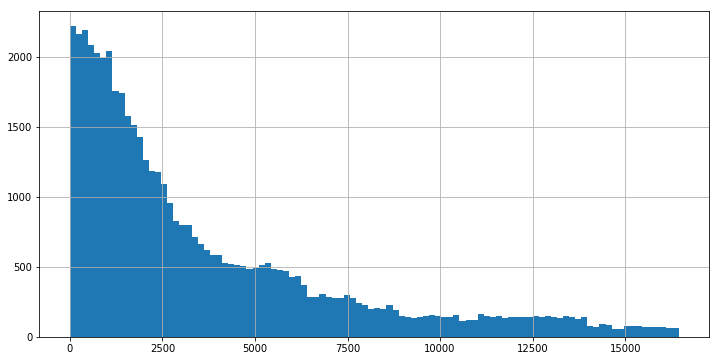

In [279]:
# распределение в ранкинге
plt.rcParams['figure.figsize'] = (12,6) 
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

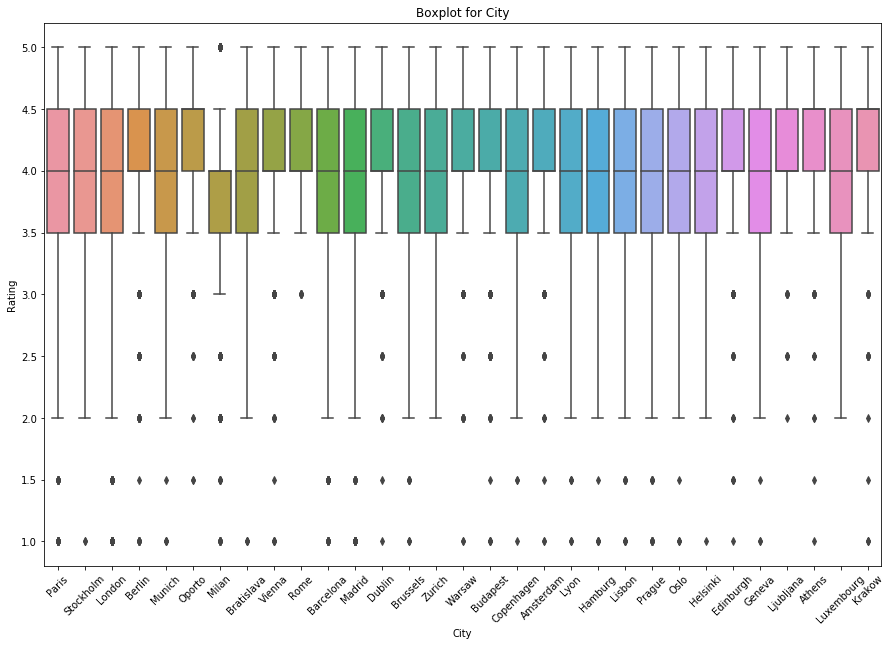

In [280]:
# Построим боксплоты для рейтинга
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(x = 'City', y = 'Rating',data=df_train)
plt.xticks(rotation=45)
ax.set_title('Boxplot for City')
plt.show()

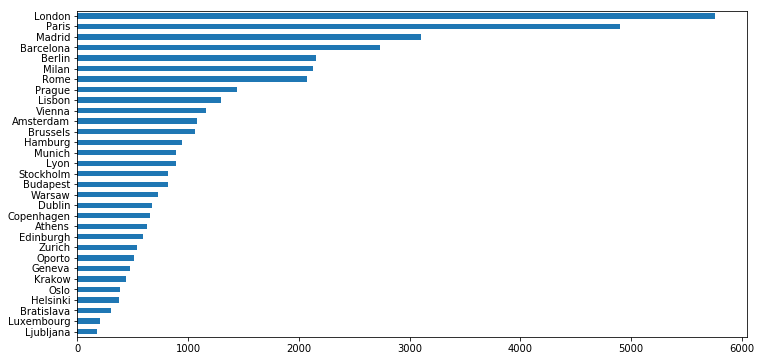

In [281]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

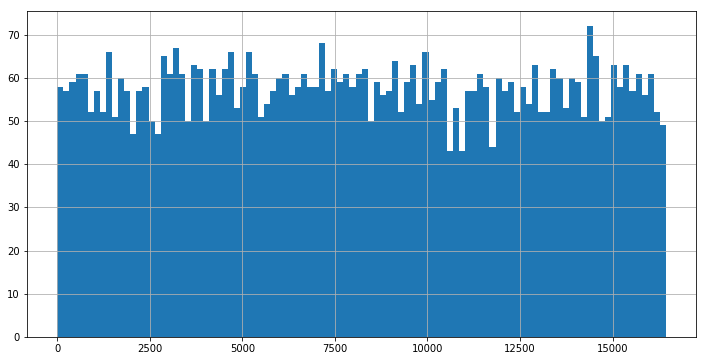

In [282]:
# Распределение в Лондоне
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

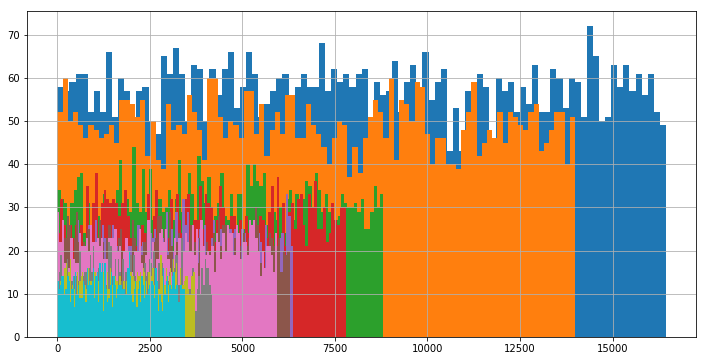

In [283]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

#Получается, что Ranking имеет нормальное распределение, 
#просто в больших городах больше ресторанов, из-за мы этого имеем смещение

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

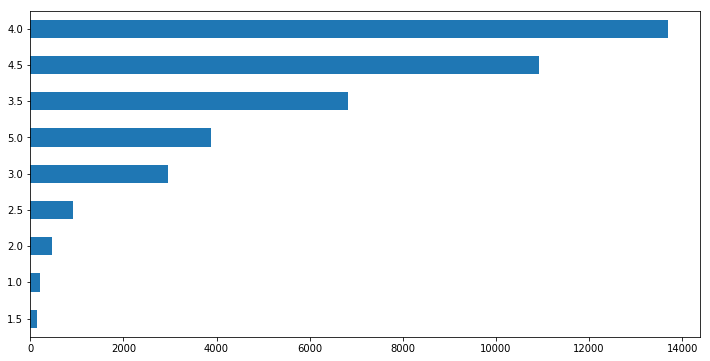

In [284]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

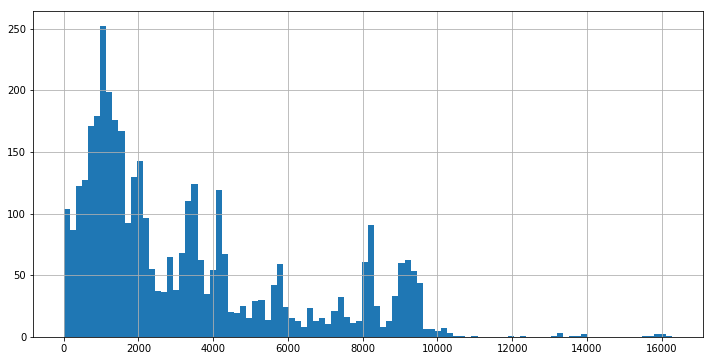

In [285]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

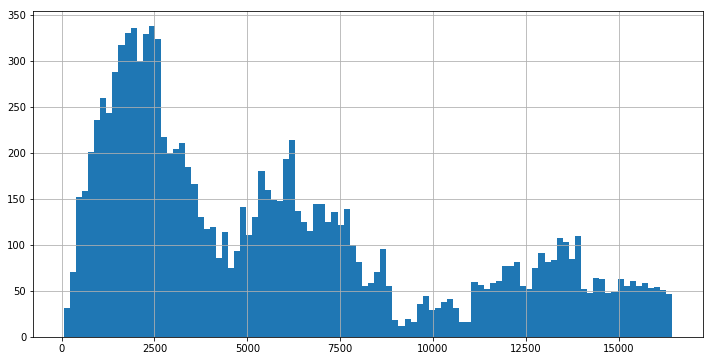

In [286]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

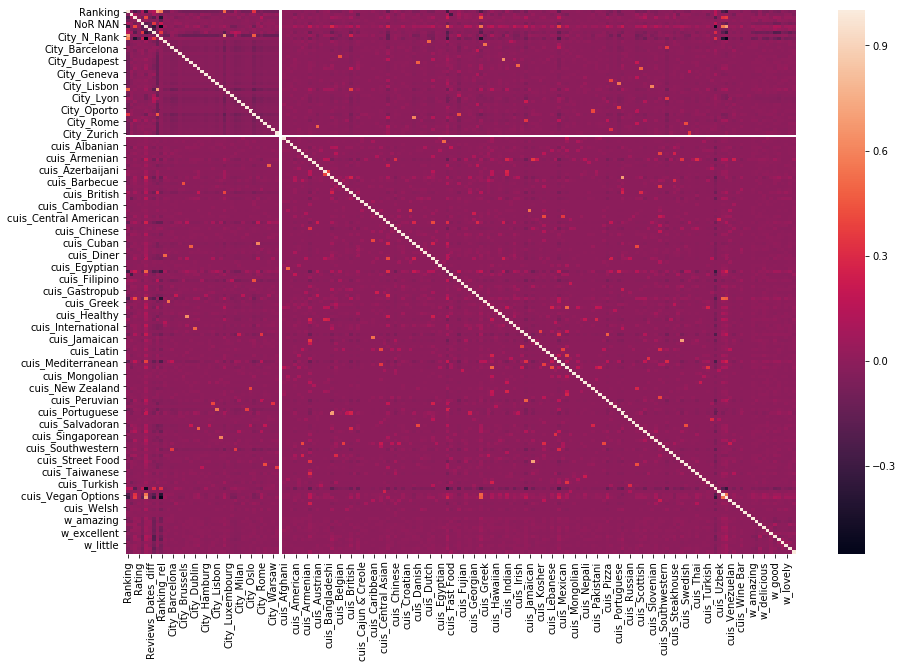

In [287]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

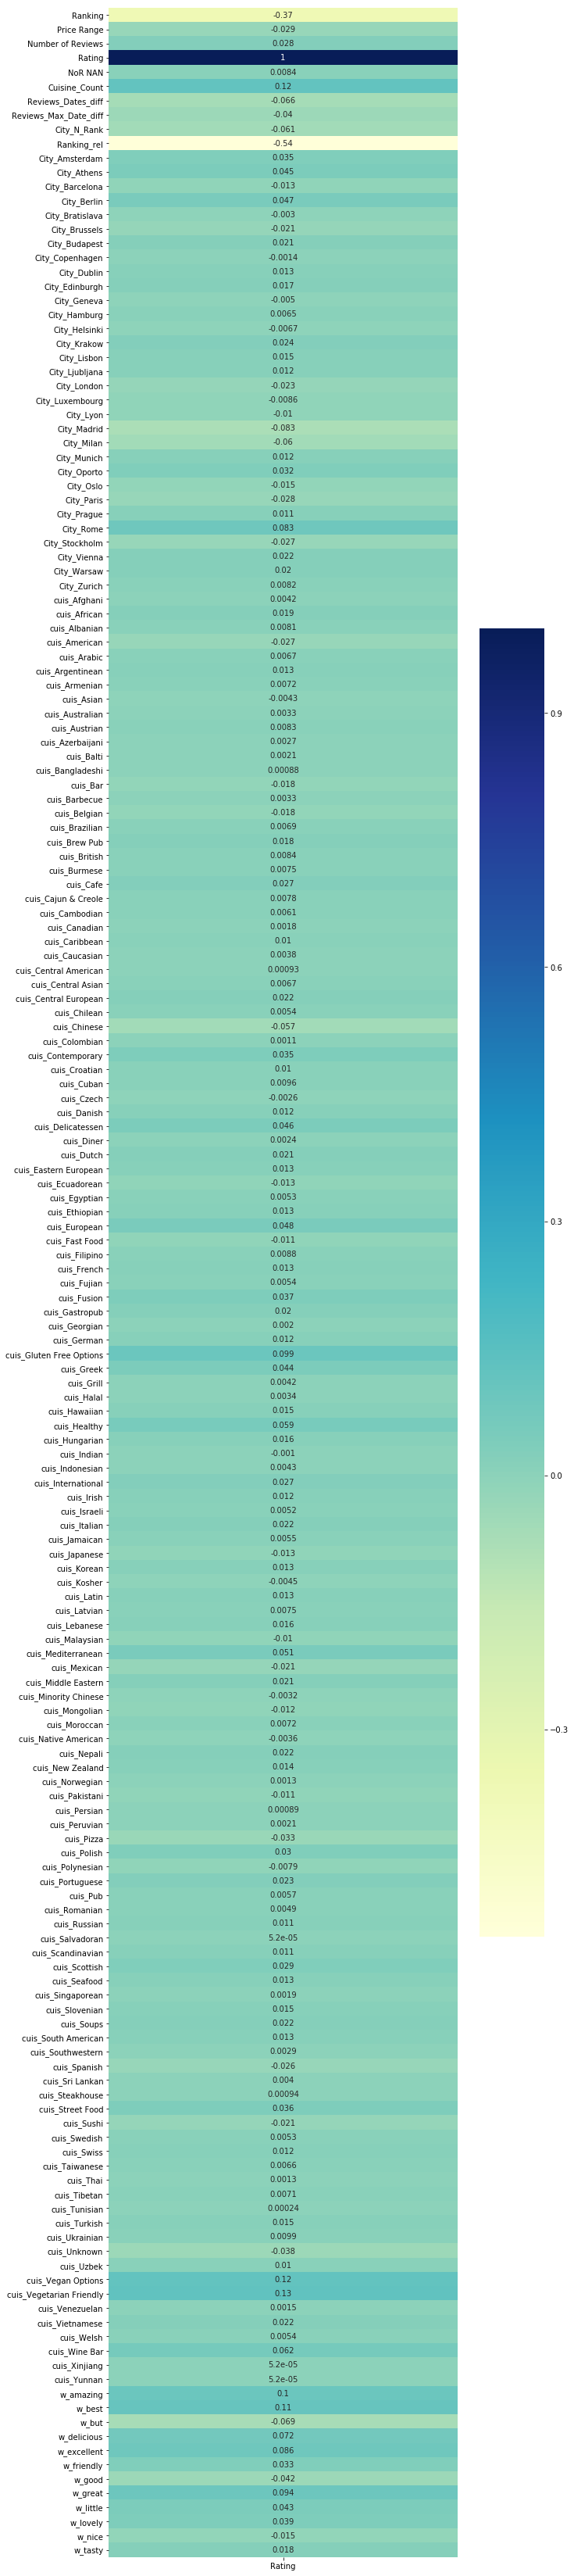

In [288]:
plt.rcParams['figure.figsize'] = (10,60)
sns.heatmap(data.query('sample == 1').corr()['Rating'].dropna().to_frame(),cmap="YlGnBu",annot=True)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [289]:
# # на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.info()

In [290]:
# def preproc_data(df_input):
#     '''includes several functions to pre-process the predictor data.'''
    
#     df_output = df_input.copy()
    
#     # ################### 1. Предобработка ############################################################## 
#     # убираем не нужные для модели признаки
#     df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
#     # ################### 2. NAN ############################################################## 
#     # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
#     # тут ваш код по обработке NAN
#     # ....
    
    
#     # ################### 3. Encoding ############################################################## 
#     # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
#     # тут ваш код не Encoding фитчей
#     # ....
    
    
#     # ################### 4. Feature Engineering ####################################################
#     # тут ваш код не генерацию новых фитчей
#     # ....
    
    
#     # ################### 5. Clean #################################################### 
#     # убираем признаки которые еще не успели обработать, 
#     # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
#     object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
#     df_output.drop(object_columns, axis = 1, inplace=True)
    
#     return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [291]:
# df_preproc = preproc_data(data)
# df_preproc.sample(10)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 192 entries, Restaurant_id to w_tasty
dtypes: datetime64[ns](2), float64(5), int64(5), object(9), uint8(171)
memory usage: 16.5+ MB


In [294]:
data.columns[:30]

Index(['Restaurant_id', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'NoR NAN', 'Cuisine_Style_List', 'Cuisine_Count', 'Reviews_Words',
       'Reviews_Dates', 'Reviews_Min_Date', 'Reviews_Max_Date',
       'Reviews_Dates_diff', 'Reviews_Max_Date_diff', 'City_N_Rank',
       'Ranking_rel', 'key_words_n', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Bratislava', 'City_Brussels',
       'City_Budapest', 'City_Copenhagen'],
      dtype='object')

In [295]:
#Берем данные из предварительной обработки
df_preproc = data.drop(['Restaurant_id', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine_Style_List','Reviews_Words', \
                        'Reviews_Dates', 'Reviews_Min_Date', 'Reviews_Max_Date','key_words_n'], axis=1)

In [296]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [297]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [298]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 180), (40000, 180), (40000, 179), (32000, 179), (8000, 179))

# Model 
Сам ML

In [299]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [300]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [301]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


заметим, что рейтинг имеет шаг 0.5. Модель предсказывает рейтинг без учёта этой детали.
Если вручную округлить результаты предсказания, то их качество улучшится.

In [302]:
y_pred_round = np.round(y_pred * 2)/2
display(y_pred_round)

array([4.5, 5. , 4.5, ..., 4.5, 4. , 4. ])

In [303]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MAE considering round:', metrics.mean_absolute_error(y_test, y_pred_round))

MAE: 0.20048875
MAE considering round: 0.1665


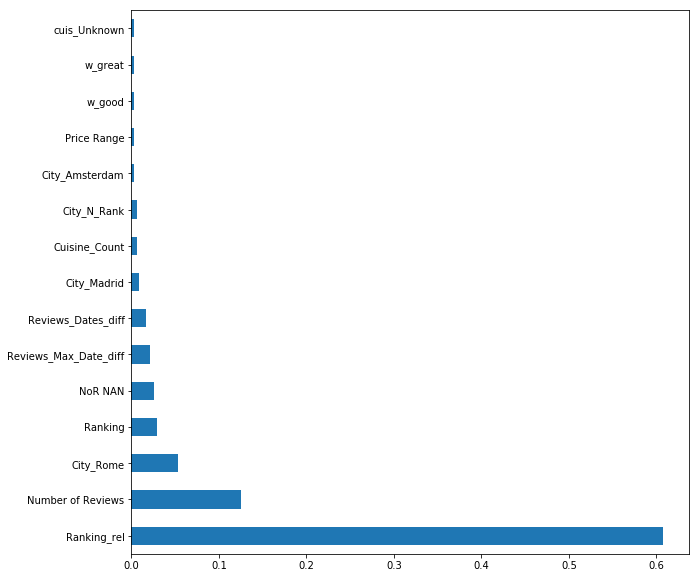

In [304]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

(15.5, -0.5)

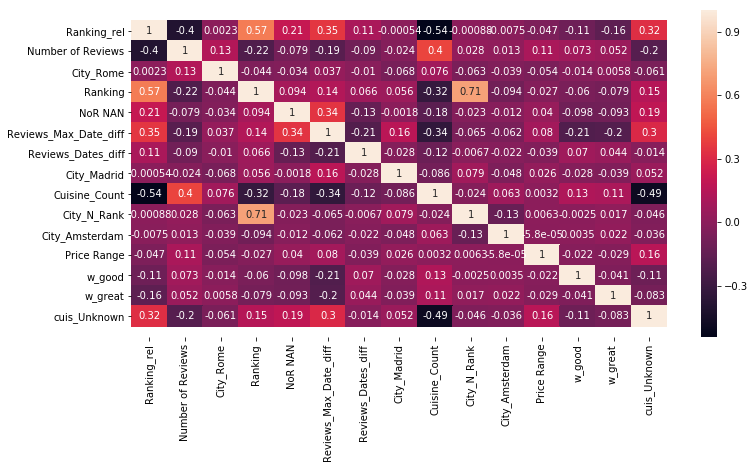

In [305]:
# Проверяем корреляцию важных переменных
df_temp = data.loc[data['sample'] == 1, list(feat_importances.nlargest(15).index[0:15])]
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.heatmap(df_temp.corr(), annot=True, fmt='.2g')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [306]:
list_temp = list(feat_importances.nlargest(15).index[[9,10]])
display(df_temp[list_temp].corr())

,City_N_Rank,City_Amsterdam
City_N_Rank,1.000000,-0.130166
City_Amsterdam,-0.130166,1.000000


# Submission
Если все устраевает - готовим Submission на кагл

In [307]:
test_data.shape

(10000, 180)

In [308]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,NoR NAN,Cuisine_Count,Reviews_Dates_diff,Reviews_Max_Date_diff,City_N_Rank,Ranking_rel,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,cuis_Afghani,cuis_African,cuis_Albanian,cuis_American,cuis_Arabic,cuis_Argentinean,cuis_Armenian,cuis_Asian,cuis_Australian,cuis_Austrian,cuis_Azerbaijani,cuis_Balti,cuis_Bangladeshi,cuis_Bar,cuis_Barbecue,cuis_Belgian,cuis_Brazilian,cuis_Brew Pub,cuis_British,cuis_Burmese,cuis_Cafe,cuis_Cajun & Creole,cuis_Cambodian,cuis_Canadian,cuis_Caribbean,cuis_Caucasian,cuis_Central American,cuis_Central Asian,cuis_Central European,cuis_Chilean,cuis_Chinese,cuis_Colombian,cuis_Contemporary,cuis_Croatian,cuis_Cuban,cuis_Czech,cuis_Danish,cuis_Delicatessen,cuis_Diner,cuis_Dutch,cuis_Eastern European,cuis_Ecuadorean,cuis_Egyptian,cuis_Ethiopian,cuis_European,cuis_Fast Food,cuis_Filipino,cuis_French,cuis_Fujian,cuis_Fusion,cuis_Gastropub,cuis_Georgian,cuis_German,cuis_Gluten Free Options,cuis_Greek,cuis_Grill,cuis_Halal,cuis_Hawaiian,cuis_Healthy,cuis_Hungarian,cuis_Indian,cuis_Indonesian,cuis_International,cuis_Irish,cuis_Israeli,cuis_Italian,cuis_Jamaican,cuis_Japanese,cuis_Korean,cuis_Kosher,cuis_Latin,cuis_Latvian,cuis_Lebanese,cuis_Malaysian,cuis_Mediterranean,cuis_Mexican,cuis_Middle Eastern,cuis_Minority Chinese,cuis_Mongolian,cuis_Moroccan,cuis_Native American,cuis_Nepali,cuis_New Zealand,cuis_Norwegian,cuis_Pakistani,cuis_Persian,cuis_Peruvian,cuis_Pizza,cuis_Polish,cuis_Polynesian,cuis_Portuguese,cuis_Pub,cuis_Romanian,cuis_Russian,cuis_Salvadoran,cuis_Scandinavian,cuis_Scottish,cuis_Seafood,cuis_Singaporean,cuis_Slovenian,cuis_Soups,cuis_South American,cuis_Southwestern,cuis_Spanish,cuis_Sri Lankan,cuis_Steakhouse,cuis_Street Food,cuis_Sushi,cuis_Swedish,cuis_Swiss,cuis_Taiwanese,cuis_Thai,cuis_Tibetan,cuis_Tunisian,cuis_Turkish,cuis_Ukrainian,cuis_Unknown,cuis_Uzbek,cuis_Vegan Options,cuis_Vegetarian Friendly,cuis_Venezuelan,cuis_Vietnamese,cuis_Welsh,cuis_Wine Bar,cuis_Xinjiang,cuis_Yunnan,w_amazing,w_best,w_but,w_delicious,w_excellent,w_friendly,w_good,w_great,w_little,w_lovely,w_nice,w_tasty
9898,772.0,2,45.0,0.0,0,3,1,151,2464.0,0.313312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1
8015,143.0,2,90.0,0.0,0,6,61,22,3006.0,0.047572,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7519,619.0,2,47.0,0.0,0,3,225,54,1413.0,0.438075,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
7090,1386.0,2,9.0,0.0,0,1,171,357,1413.0,0.980892,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [309]:
test_data = test_data.drop(['Rating'], axis=1)

In [310]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [311]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [312]:
predict_submission

array([3.05 , 4.175, 4.335, ..., 3.145, 4.495, 4.26 ])

In [313]:
#округляем до 0,5 как в фактических оценках
predict_submission =  np.round(predict_submission * 2)/2 # (predict_submission * 2).round(0) / 2
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4.5])

In [314]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.0
8,id_8,4.5
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
